# Bezmerizing

By [Allison Parrish](https://www.decontextualize.com/)

Actual copy TK.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import bezmerizing
from bezmerizing import flatten

In [3]:
from flat import document, rgba, shape

In [4]:
import numpy as np

In [5]:
from IPython.display import SVG, Image, display

In [6]:
def show(page):
    display(Image(page.image(kind='rgba').png()))

## Bezier objects

In [6]:
bez = bezmerizing.Bezier(
    [25, 25], # start
    [150, 50], # control point 1
    [50, 150], # control point 2
    [175, 175] # end
)

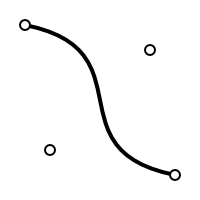

In [7]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(4)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(2)
page.place(curve_fig.path(bez.flat_commands()))
page.place(point_fig.circle(*bez.start, 5))
page.place(point_fig.circle(*bez.cp1, 5))
page.place(point_fig.circle(*bez.cp2, 5))
page.place(point_fig.circle(*bez.end, 5))
show(page)

In [8]:
n_pts = 12
pts = []
for i in range(n_pts + 1):
    pts.append(bez.point(i/n_pts))

In [9]:
pts

[[25.0, 25.0],
 [51.822916666666664, 32.725694444444436],
 [70.83333333333334, 43.05555555555556],
 [83.59375, 55.46875],
 [91.66666666666667, 69.44444444444444],
 [96.6145833333333, 84.46180555555554],
 [100.0, 100.0],
 [103.38541666666667, 115.53819444444447],
 [108.33333333333331, 130.55555555555554],
 [116.40625, 144.53125],
 [129.16666666666669, 156.94444444444446],
 [148.17708333333331, 167.27430555555554],
 [175.0, 175.0]]

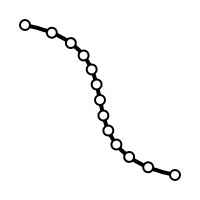

In [10]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(4)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(2)
page.place(curve_fig.path(bez.flat_commands()))
for pt in pts:
    page.place(point_fig.circle(*pt, 5))
show(page)

## Curve offsets

In [11]:
pts = bez.offsets(np.linspace(4, 16, 12))

In [12]:
pts

[[24.215535459447263, 28.92232270276368],
 [51.85572695579502, 38.24882074409491],
 [69.66723496307195, 49.96485481982059],
 [80.10470644971427, 63.12291787638585],
 [85.84993930101872, 77.57145110298929],
 [89.01167252711954, 93.48703707730117],
 [91.43895705583678, 110.73458776358862],
 [95.26984009110471, 129.02682668730665],
 [103.14811232005785, 147.81014760598933],
 [117.69807795829114, 165.53884417186927],
 [140.30771040596167, 180.15194788161443],
 [171.86214183778907, 190.68929081105472]]

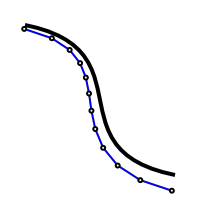

In [13]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(4)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(2)
offset_fig = shape().stroke(rgba(0, 0, 255, 255)).nofill().width(2)
page.place(curve_fig.path(bez.flat_commands()))
page.place(offset_fig.polyline(flatten(pts)))
for pt in pts:
    page.place(point_fig.circle(*pt, 2))
show(page)

In [14]:
poly = bez.offset_polygon(np.linspace(8, 16, 20))

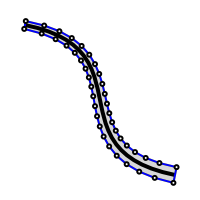

In [15]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(4)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(2)
offset_fig = shape().stroke(rgba(0, 0, 255, 255)).fill(rgba(0, 0, 0, 40)).width(2)
page.place(curve_fig.path(bez.flat_commands()))
page.place(offset_fig.polygon(flatten(poly)))
for pt in poly:
    page.place(point_fig.circle(*pt, 2))
show(page)

## Curves from points

In [16]:
pts = [[np.random.normal(100, 50), np.random.normal(100, 50)] for i in range(12)]

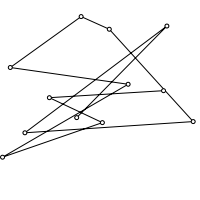

In [17]:
d = document(200, 200, 'pt')
page = d.addpage()
line_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(1)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(1)
page.place(line_fig.polyline(flatten(pts)))
for pt in pts:
    page.place(point_fig.circle(*pt, 2))
show(page)

In [18]:
curves = bezmerizing.beziers_from_catmull(pts, tightness=0.1)

In [19]:
len(curves)

9

In [20]:
cmds = bezmerizing.beziers_flat_commands(curves)

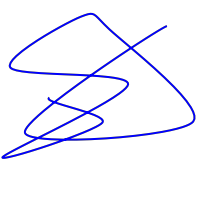

In [21]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 255, 255)).nofill().width(2)
page.place(curve_fig.path(cmds))
show(page)

In [23]:
cmds = bezmerizing.smooth_point_path(pts, tightness=0.1)

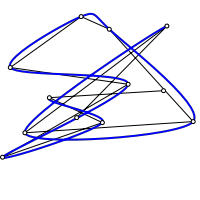

In [24]:
d = document(200, 200, 'pt')
page = d.addpage()
line_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(1)
curve_fig = shape().stroke(rgba(0, 0, 255, 255)).nofill().width(2)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(1)
page.place(line_fig.polyline(flatten(pts)))
page.place(curve_fig.path(cmds))
for pt in pts:
    page.place(point_fig.circle(*pt, 2))
show(page)

## Offsets of lists of Beziers

In [83]:
polyline = bezmerizing.beziers_tangent_offsets(
    curves,
    distances=np.sin(np.linspace(0, np.pi*50, 500))*6,
    samples_per=48
)
curve_cmds = bezmerizing.beziers_flat_commands(curves)

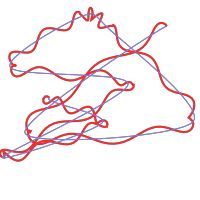

In [86]:
d = document(200, 200, 'pt')
page = d.addpage()
polyline_fig = shape().stroke(rgba(255, 40, 40, 255)).width(2)
curve_fig = shape().stroke(rgba(128, 128, 255, 255))
page.place(polyline_fig.polyline(flatten(polyline)))
page.place(curve_fig.path(curve_cmds))
show(page)

In [25]:
poly = bezmerizing.beziers_tangent_offset_polygon(
    curves,
    thicknesses=[2, 8, 2],
    samples_per=12)

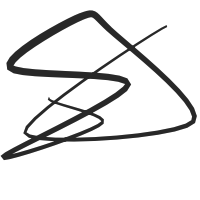

In [26]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().fill(rgba(40, 40, 40, 255)).nostroke()
page.place(curve_fig.polygon(flatten(poly)))
show(page)

## Putting everything together

In [27]:
pts = [[np.random.normal(400, 150), np.random.normal(400, 150)] for i in range(24)]

In [28]:
thicknesses = (np.sin(np.linspace(0, np.pi*4, 100))+1) * 8

In [29]:
poly = bezmerizing.fancy_curve(pts, thicknesses=thicknesses, samples_per=24)

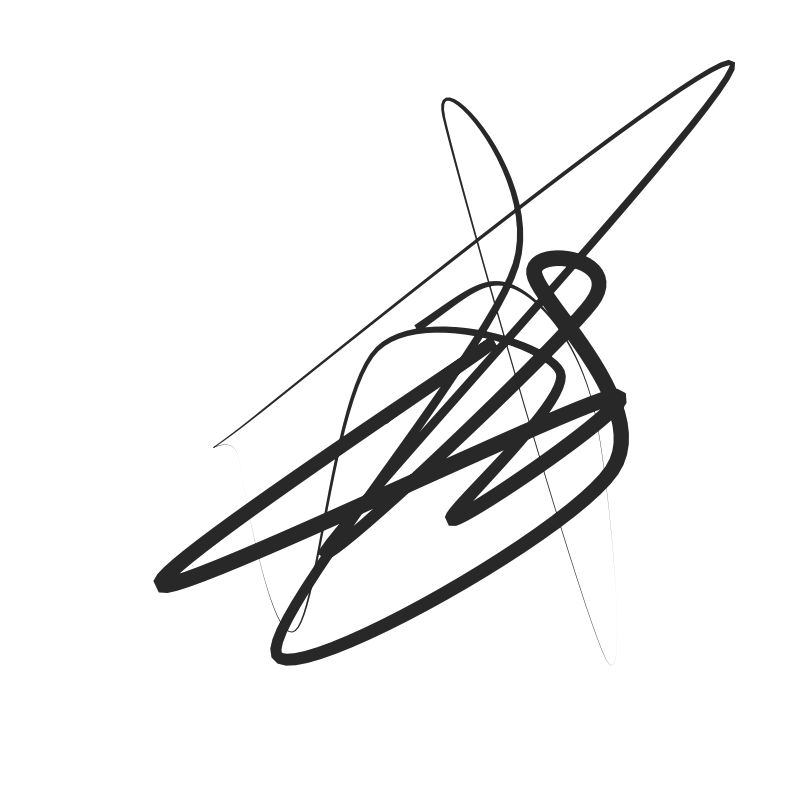

In [30]:
d = document(800, 800, 'pt')
page = d.addpage()
curve_fig = shape().fill(rgba(40, 40, 40, 255)).nostroke()
page.place(curve_fig.polygon(flatten(poly)))
show(page)

## Path class

In [7]:
from bezmerizing.path import Path
from flat import command

In [18]:
p = Path([
    command.moveto(10, 10),
    command.lineto(15, 25),
    command.curveto(15, 30, 5, 30, 5, 25),
    command.closepath
])

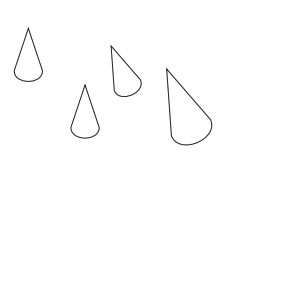

In [26]:
d = document(100, 100, 'mm')
page = d.addpage()
fig = shape().stroke(rgba(40, 40, 40, 255)).nofill()
page.place(fig.path(p))
page.place(fig.path(p.translate(20, 20)))
page.place(fig.path(p.translate(20, 20).rotate(np.pi*0.125)))
page.place(fig.path(p.translate(20, 20).rotate(np.pi*0.125).scale(1.5)))
show(page)

In [27]:
print(p)

Path([moveto(x=10.0000, y=10.0000), lineto(x=15.0000, y=25.0000), curveto(x1=15.0000, y1=30.0000, x2=5.0000, y2=30.0000, x=5.0000, y=25.0000), closepath])


In [37]:
pts = [[np.random.normal(), np.random.normal()] for i in range(24)]
thicknesses = (np.sin(np.linspace(0, np.pi*4, 100))+1) * 0.1
poly = bezmerizing.fancy_curve(pts, thicknesses=thicknesses, samples_per=24)

In [38]:
p = Path.frompoints(poly, close=True)

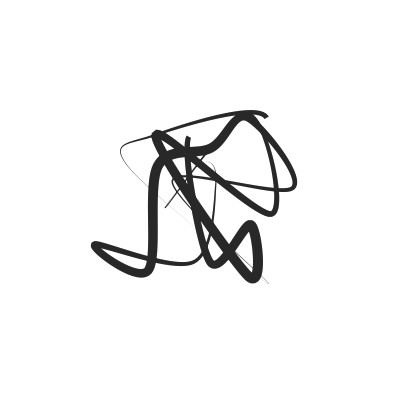

In [46]:
d = document(400, 400, 'pt')
page = d.addpage()
curve_fig = shape().fill(rgba(40, 40, 40, 255)).nostroke()
page.place(curve_fig.path(p.scale(50).translate(200, 200)))
show(page)